# Project : Galway Windspeed Analysis 


Import Python Libraries  

In [70]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk

Data collection    

Source : [Met Éireann  ](https://www.met.ie/climate/available-data/historical-data) - The Irish Meteorological Service  

In [71]:
# The dataset  was downloaded  from Met Éireann then named and saved in this repository
filename= "macehead_wind_data.csv"
directory="data/"
file_path = directory + filename

macehead_df = pd.read_csv(file_path, skiprows=17)
# show
macehead_df



C:\Users\marou\AppData\Local\Temp\ipykernel_20740\1697424725.py:6: DtypeWarning: Columns (2,4,6,7,8,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  macehead_df = pd.read_csv(file_path, skiprows=17)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,13-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,
1,13-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,
2,13-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,
3,13-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,
4,13-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195499,30-nov-2025 20:00,0,0.8,0,10.6,0,10.5,10.3,12.5,97,996.3,2,14,2,240
195500,30-nov-2025 21:00,0,1.4,0,10.0,0,9.8,9.6,12.0,97,995.8,2,10,2,240
195501,30-nov-2025 22:00,0,0.4,0,10.0,0,9.9,9.7,12.0,97,995.2,2,10,2,240
195502,30-nov-2025 23:00,0,0.2,0,10.8,0,10.6,10.4,12.6,97,994.4,2,12,2,240


In [72]:
# read the first 14 rows to extract metadata and column descriptions, the rows include station info, location, and what each column represents
col_description = pd.read_csv(file_path, nrows=14, header=None, sep=";")  
col_description

,0
0,Station Name: MACE HEAD
1,Station Height: 21 M
2,"Latitude:53.326 ,Longitude: -9.901"
3,date: - Date and Time (utc)
4,rain: - Precipitation Amount (mm)\t
5,temp: - Air Temperature (C)\t
6,wetb: - Wet Bulb Temperature (C)
7,dewpt: - Dew Point Temperature (C)
8,vappr: - Vapour Pressure (hPa)\t\t ...
9,rhum: - Relative Humidity (%)


In [73]:
# convert date Dtype into datetime
macehead_df['date'] = pd.to_datetime(macehead_df['date'])


C:\Users\marou\AppData\Local\Temp\ipykernel_20740\1943070312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macehead_df['date'] = pd.to_datetime(macehead_df['date'])


In [74]:
# reindexing : set the index of the dataframe to be a date
macehead_df.set_index('date',inplace=True)
# show

# add df index as a column
macehead_df['date'] = macehead_df.index
macehead_df['date']



date
2003-08-13 01:00:00   2003-08-13 01:00:00
2003-08-13 02:00:00   2003-08-13 02:00:00
2003-08-13 03:00:00   2003-08-13 03:00:00
2003-08-13 04:00:00   2003-08-13 04:00:00
2003-08-13 05:00:00   2003-08-13 05:00:00
                              ...        
2025-11-30 20:00:00   2025-11-30 20:00:00
2025-11-30 21:00:00   2025-11-30 21:00:00
2025-11-30 22:00:00   2025-11-30 22:00:00
2025-11-30 23:00:00   2025-11-30 23:00:00
2025-12-01 00:00:00   2025-12-01 00:00:00
Name: date, Length: 195504, dtype: datetime64[ns]

In [75]:
# show windspeed column
macehead_df['wdsp']

date
2003-08-13 01:00:00      
2003-08-13 02:00:00      
2003-08-13 03:00:00      
2003-08-13 04:00:00      
2003-08-13 05:00:00      
                       ..
2025-11-30 20:00:00    14
2025-11-30 21:00:00    10
2025-11-30 22:00:00    10
2025-11-30 23:00:00    12
2025-12-01 00:00:00    19
Name: wdsp, Length: 195504, dtype: object

In [76]:
# checking for missing values from the entire df, the output doesnt retun any because the original missing values were filled with space. 
print(macehead_df.isna().sum())


ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
date     0
dtype: int64


In [77]:
# this method only replaces the cells with values that are exactly one space charcter.  SO this method catches only very simple missing values.
macehead_df.replace(' ', np.nan, inplace=True)

In [78]:
# check the rows with NaN values, to confirm if the space was indeed replaced by NaN values.
macehead_df.head(1400)[macehead_df.head(1400).isna().any(axis=1)]

# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,date
date,,,,,,,,,,,,,,,
2003-08-13 01:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-08-13 01:00:00
2003-08-13 02:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-08-13 02:00:00
2003-08-13 03:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-08-13 03:00:00
2003-08-13 04:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-08-13 04:00:00
2003-08-13 05:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-08-13 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-06 11:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-10-06 11:00:00
2003-10-06 12:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-10-06 12:00:00
2003-10-06 13:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN,2003-10-06 13:00:00


In [79]:
# check missing values
print(macehead_df.isna().sum())


ind         0
rain     1240
ind.1       0
temp     1240
ind.2       0
wetb     1328
dewpt    1328
vappr    1328
rhum     1328
msl      1582
ind.3       0
wdsp     1296
ind.4       0
wddir    1291
date        0
dtype: int64


In [80]:
# remove missing values
macehead_df.dropna(inplace=True)

In [81]:
# change windspeed Dtype into float instead of object
macehead_df['wdsp'] = macehead_df['wdsp'].astype('float64') 

# plot windspeed overtime
plt.figure(figsize=(14,6))
sns.lineplot(data=macehead_df, x='date', y='wdsp', color='lightcoral')
plt.xlabel('Years')
plt.ylabel('Mean Windspeed in knots')
plt.title('Mace Head station - Windspeed overtime : 2003-2025')
plt.show()


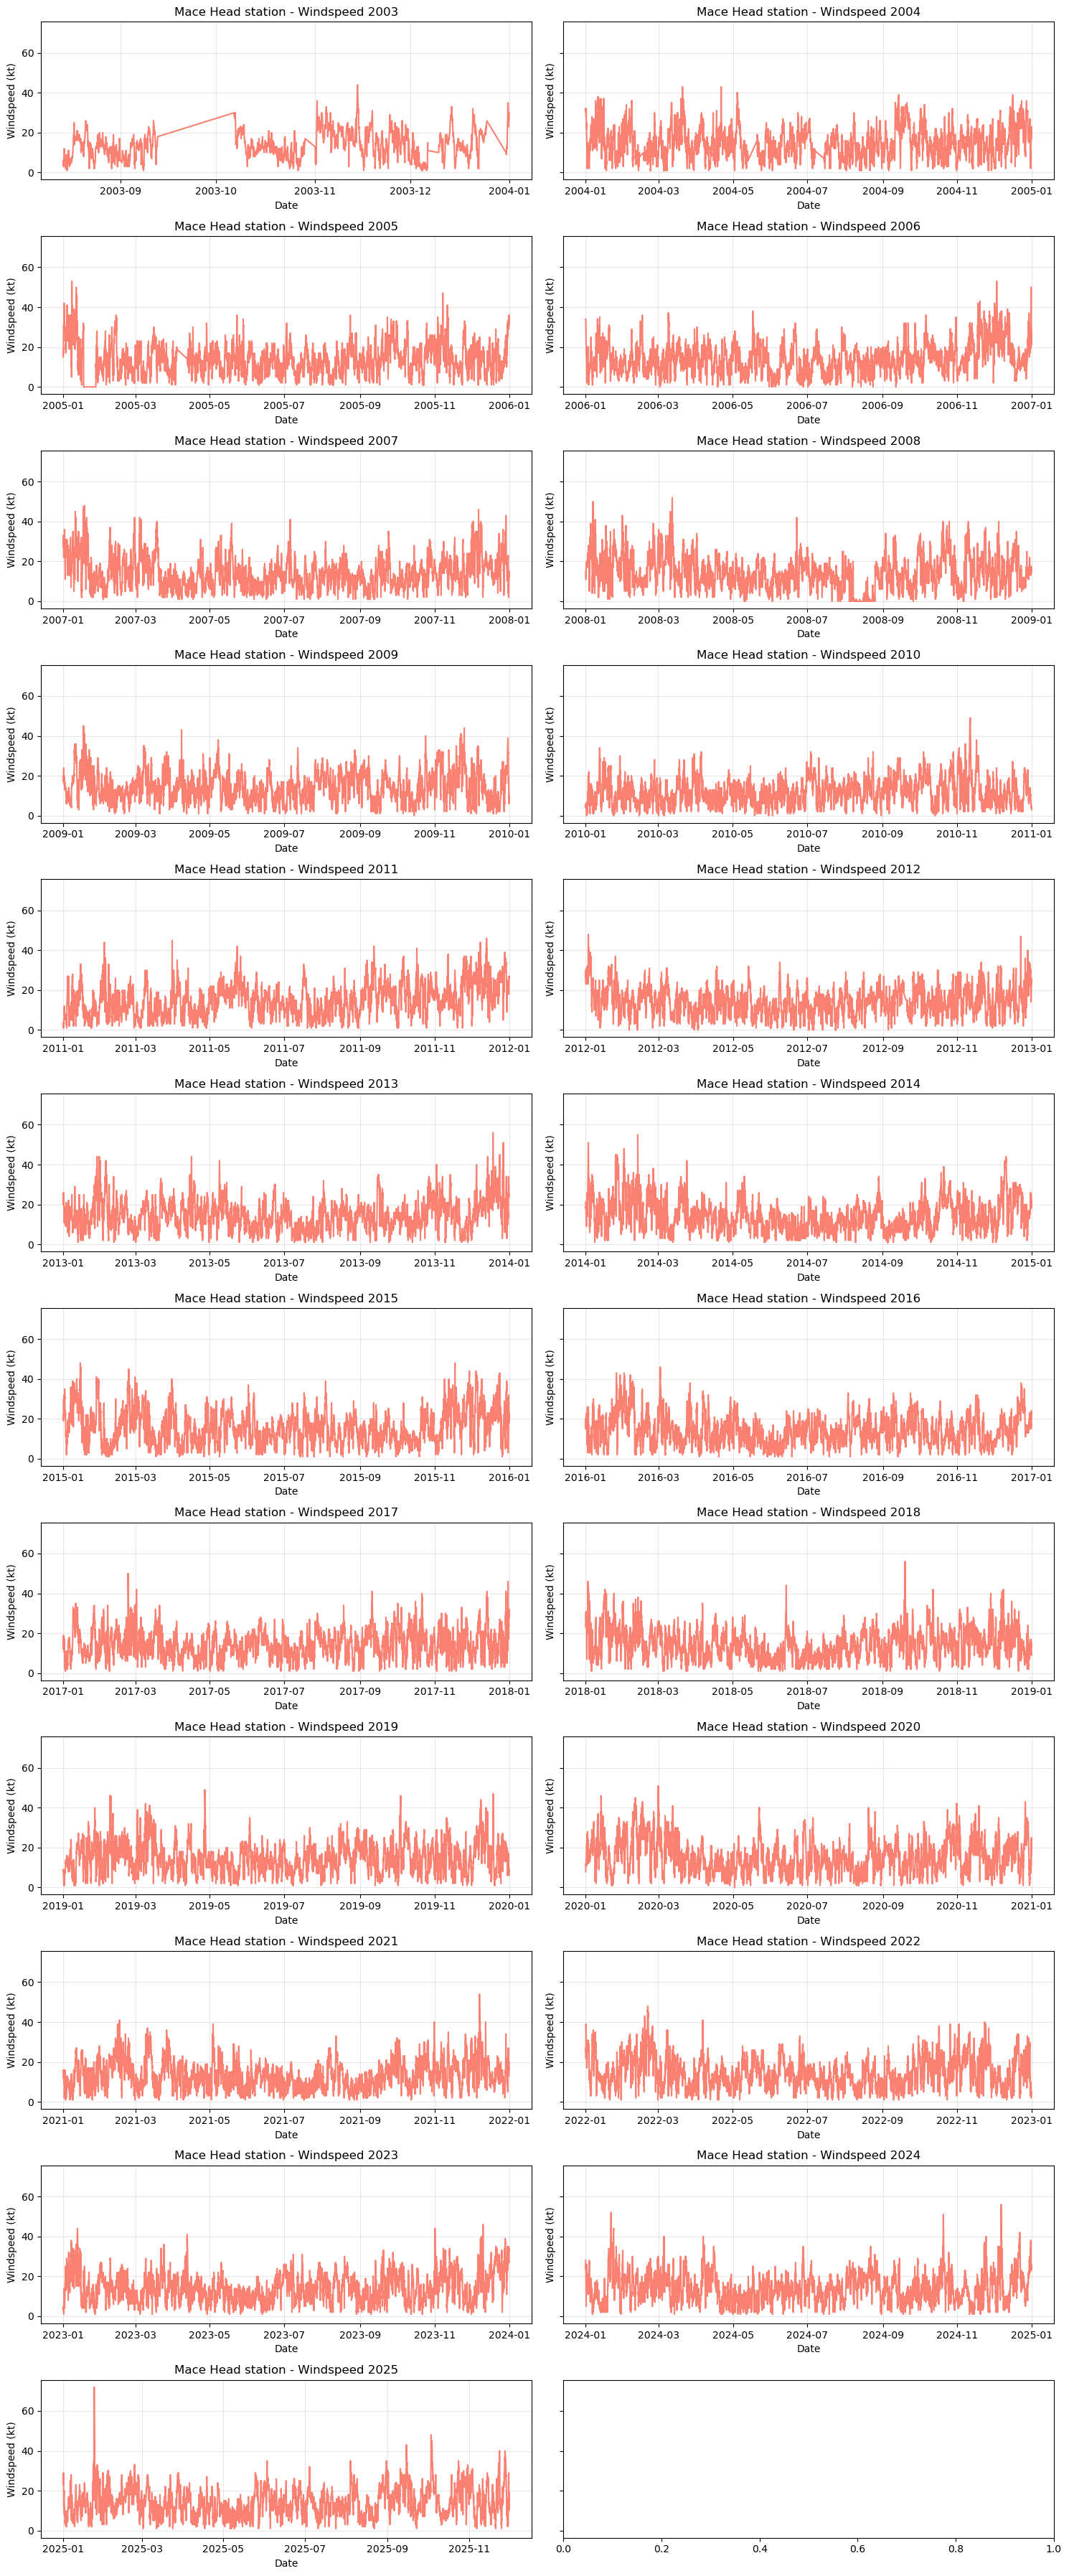

In [89]:
# add a new column for 'Years'
macehead_df["year"] = macehead_df["date"].dt.year
# select the year column from the data frame, then returns all the values in that column
years = macehead_df["year"].unique()
years.sort()
# number of rows needed to fit n plots into cols columns
n = len(years)
cols = 2
rows = (n + cols - 1) // cols


cmap = plt.cm.viridis
norm = plt.Normalize(min(years), max(years))

# define grid size (2 columns)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), sharey=True)
axes = axes.flatten()  # flatten for easy indexing

# plot each year
for i, year in enumerate(years):
    data_year = macehead_df[macehead_df.index.year == year]
    axes[i].plot(data_year.index, data_year['wdsp'], color='salmon')
    axes[i].set_title(f'Mace Head station - Windspeed {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Windspeed (kt)')
    axes[i].grid(True, alpha=0.3)


# show
plt.tight_layout()
plt.show()




# method used : 
# also, this solution was generated by AI (chat GPT) in response to the prompt : 